In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Hulk is eating pizza, Catwoman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating Couscous and you are eating grapes"
]

In [91]:
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [92]:
print(v.vocabulary_)

{'thor': 25, 'eating': 11, 'pizza': 22, 'hulk': 15, 'is': 17, 'catwoman': 8, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 16, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 13, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 12, 'dot': 10, 'am': 1, 'couscous': 9, 'and': 3, 'you': 27, 'are': 6, 'grapes': 14}


In [93]:
all_features_names = v.get_feature_names_out()

for word in all_features_names:
    index = v.vocabulary_.get(word)

    idf_score = v.idf_[index]

    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
catwoman : 2.386294361119891
couscous : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
hulk : 2.386294361119891
iphone : 2.386294361119891
is : 1.1335313926245225
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [94]:
print(transform_output.toarray()[0])

[0.24266547 0.         0.         0.         0.         0.
 0.         0.24266547 0.24266547 0.         0.         0.40286636
 0.         0.         0.         0.24266547 0.         0.11527033
 0.         0.         0.         0.         0.72799642 0.
 0.         0.24266547 0.         0.        ]


In [95]:
import pandas as pd

df = pd.read_csv("Ecommerce_data.csv")
print(df.shape)
df.head(5)

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [96]:
#check the distribution of labels 
df['label'].value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [97]:
df['label_num'] = df['label'].map({
    'Household' : 0, 
    'Electronics': 1,  
    'Clothing & Accessories': 2,
    'Books': 3
})

df.head(5)

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=1022,
    stratify=df.label_num #with faiiiiir
)

In [99]:
X_train.shape

(19200,)

In [100]:
X_test.shape

(4800,)

In [101]:
X_train.head()

14200    ORPIO (LABLE) Stainless Steel 2 in 1 Dual Salt...
16377    MBTC Horse Bar Stool Chair in Beige Color (Set...
18341    Shree Chrome Finish Bent Ply Single Mould Wood...
11496    Klamotten Women's Nightdress (Pack of 2) Klamo...
14626    Butterfly Fields - Mathematics concept map boo...
Name: Text, dtype: object

In [102]:
y_test.value_counts()

label_num
1    1200
2    1200
3    1200
0    1200
Name: count, dtype: int64

In [103]:
#we will use KNN as first attempt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1200
           1       0.97      0.96      0.96      1200
           2       0.98      0.98      0.98      1200
           3       0.97      0.94      0.95      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [104]:
X_test[:5]

7498     WD Diskless My Cloud EX2 Ultra Network Attache...
15047    Sheomy Wayfarer Round Unisex Spectacle Frame(T...
23608    Barbie Knitted Baby Tights by Bonjour (01 (1-2...
23996    Internet Download Manager | Lifetime License |...
21446    Atlanta Healthcare Beta 350 43-Watt Air Purifi...
Name: Text, dtype: object

In [105]:
y_test[:5]

7498     1
15047    2
23608    2
23996    3
21446    0
Name: label_num, dtype: int64

In [106]:
y_pred[:5]

array([1, 2, 2, 1, 0], dtype=int64)

In [107]:
# we will test with MultinomialNB
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1200
           1       0.97      0.96      0.96      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.92      0.95      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [108]:
# we will test with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Random Forest', RandomForestClassifier())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1200
           1       0.98      0.96      0.97      1200
           2       0.98      0.99      0.98      1200
           3       0.97      0.97      0.97      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [109]:
# we will do like with n-grams; Use text pre-processing to remove stop words, punctuations and apply lemmatization
import spacy

nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [110]:
df['preprocessed_txt'] = df['Text'].apply(preprocess) 

In [111]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1,IO Crest SY PCI40010 PCI RAID Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2,Indira Designer woman Art Mysore Silk Saree Bl...


In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=1022,
    stratify=df.label_num
)

In [113]:
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Random Forest', RandomForestClassifier())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1200
           1       0.98      0.96      0.97      1200
           2       0.97      0.99      0.98      1200
           3       0.97      0.97      0.97      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1154,   13,   19,   14],
       [  23, 1158,    5,   14],
       [   9,    3, 1184,    4],
       [  27,    5,    8, 1160]], dtype=int64)

Text(95.7222222222222, 0.5, 'REALITY')

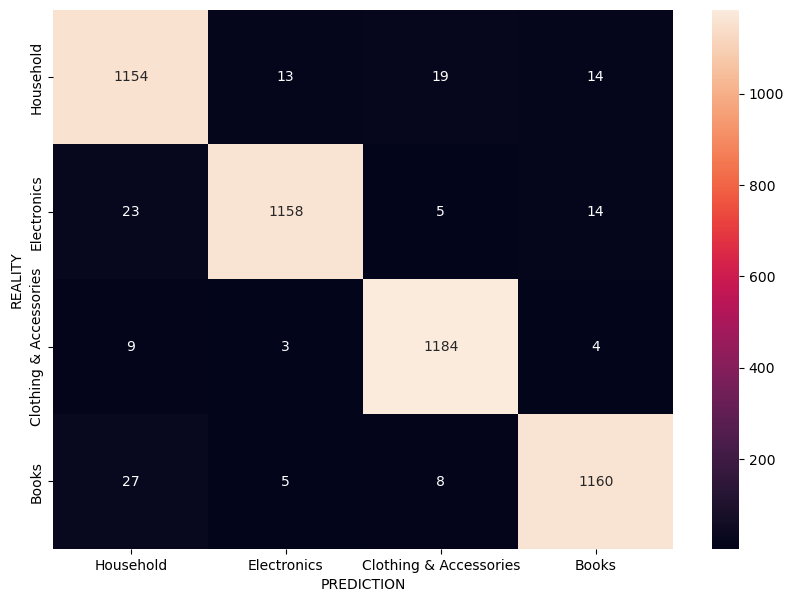

In [115]:
from matplotlib import pyplot as plt
import seaborn as sn

categories = ['Household', 'Electronics', 'Clothing & Accessories', 'Books'] #to replace the numeric indices with their category names

plt.figure(figsize = (10,7))
sn.heatmap(cm, 
           annot=True, 
           fmt='d',
           xticklabels=categories, 
           yticklabels=categories
          )
plt.xlabel('PREDICTION')
plt.ylabel('REALITY')